# Table of Contents - still adjust 
### Importing Libaries and Data Sets
### Merge department (df-dep) to analyse the Department Orders
### Barchart Orders by Deparment showing which departments have the highest frequency of product orders
### Creating Sampling Data Set 
### How often do customers return to instacart?
### Are there differences in department ordering habits based on a customer's region?
### Department Orders by Income
### Department Orders by Marital Status
### Department Orders by Age Group
### Department: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
### Export Merged Data Set

## 1. Importing libraries and data sets

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
#creating pathway for dataframes
path = os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/02 Data')

In [3]:
#import orders_products_customer_updated (incl. the exclusion of 5 orders below)
ords_prods =pd.read_pickle(os.path.join(path,'Prepared Data', 'orders_products_customers_updated.pkl'))

In [5]:
#import departments_wrangled 
df_dep =pd.read_csv(os.path.join(path,'Prepared Data','departments_wrangled.csv'))

In [6]:
df_dep.shape

(21, 2)

In [7]:
#loading garbage collector
import gc

In [8]:
ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 33 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   clients_order_number    int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float32       
 6   product_id              int32         
 7   add_to_cart_order       int32         
 8   reordered               int8          
 9   product_name            object        
 10  aisle_id                int8          
 11  department_id           int8          
 12  prices                  float32       
 13  price_range_loc         object        
 14  busiest_days            object        
 15  busiest_period_of_day   object        
 16  max_order               int8          
 17  loyalty_flag            object        
 18  mean_

In [9]:
df_dep.head(30)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Merge department (df-dep) to analyse the Department Orders

In [10]:
# Renaming the 'Unnamde: 0' column

df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [11]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [12]:
# Merging df_dep with ords_prods to df_merged

df_merged = ords_prods.merge(df_dep, on = 'department_id')

In [13]:
df_merged.head()

,order_id,user_id,clients_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,n_dependants,marital_status,income,region,exclusion_flag,age_group,income_level,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2019-02-17,3,married,40423,South,No,Young Adult: 18-32,Low Income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Young Adult: 18-32,Low Income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Young Adult: 18-32,Low Income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Young Adult: 18-32,Low Income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,South,No,Young Adult: 18-32,Low Income,beverages


In [14]:
df_merged.shape

(30964564, 34)

In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 34 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   clients_order_number    int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float32       
 6   product_id              int32         
 7   add_to_cart_order       int32         
 8   reordered               int8          
 9   product_name            object        
 10  aisle_id                int8          
 11  department_id           int8          
 12  prices                  float32       
 13  price_range_loc         object        
 14  busiest_days            object        
 15  busiest_period_of_day   object        
 16  max_order               int8          
 17  loyalty_flag            object        
 18  

In [16]:
# Frequency of departments

df_merged['department'].value_counts(dropna = False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

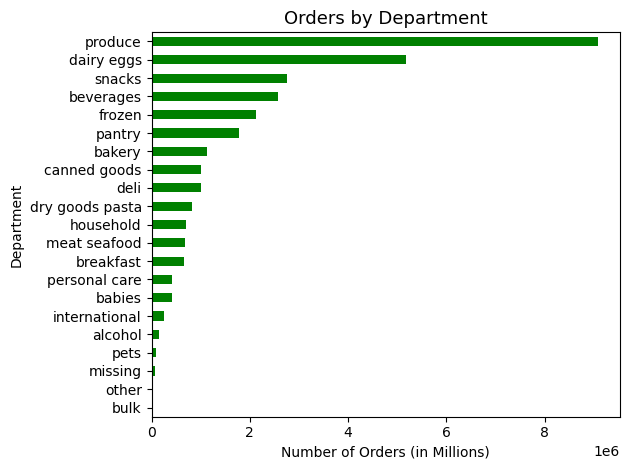

In [20]:
# Creating a horizontal bar chart for frequency of department orders

bar_dep_orders = df_merged['department'].value_counts().sort_values().plot.barh(color=['green'])

# Add labels and a title
plt.xlabel('Number of Orders (in Millions)')
plt.ylabel('Department')
plt.title('Orders by Department', fontsize=13)

# Adjust the layout to ensure everything fits
plt.tight_layout()


### Export Barchart Orders by Deparment showing which departments have the highest frequency of product orders

In [21]:
bar_dep_orders.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/Orders_by_Department_bar.png'))

In [22]:
#delete df to save space 

del bar_dep_orders

gc.collect()

10196

### Sampling Data Set

In [23]:
#creating 70/30 split for data sample
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

# store 70% of the sample in the df_big and 30% in df_small
df_big = df_merged[dev]
df_small = df_merged[~dev]

#quality check
len(df_big)+len(df_small)

30964564

## How often do customers return to instacart?

In [24]:
# Frequency for 'days_since_prior_order'

df_small['days_since_prior_order'].value_counts()

days_since_prior_order
7.0     1025016
30.0     801451
6.0      743706
5.0      628918
4.0      616983
8.0      567969
3.0      558462
2.0      435267
9.0      357010
14.0     296994
10.0     282897
1.0      279498
13.0     246754
11.0     239687
12.0     225423
15.0     193925
16.0     132485
0.0      131750
21.0     126301
17.0     110062
20.0     107694
18.0     100958
19.0      95455
22.0      87809
28.0      71172
23.0      64071
27.0      56947
24.0      54777
25.0      50962
26.0      50320
29.0      48910
Name: count, dtype: int64

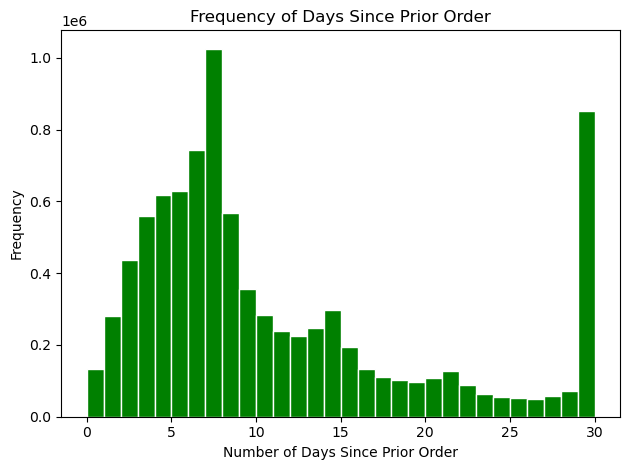

In [26]:
# Histogram for 'days_since_prior_order'

days_prior_order = df_small['days_since_prior_order'].plot.hist(bins = 30, color='green', edgecolor='white')

# Add labels and a title
plt.xlabel('Number of Days Since Prior Order')
plt.ylabel('Frequency')
plt.title('Frequency of Days Since Prior Order')

# Adjust the layout to ensure everything fits
plt.tight_layout()


### Export Histogram Number if Days Since Prior Order

In [27]:
days_prior_order.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/hist_days_since_prior_order.png'))

In [28]:
#delete df to save space 

del days_prior_order

gc.collect()

8823

## Are there differences in department ordering habits based on a customer's region?

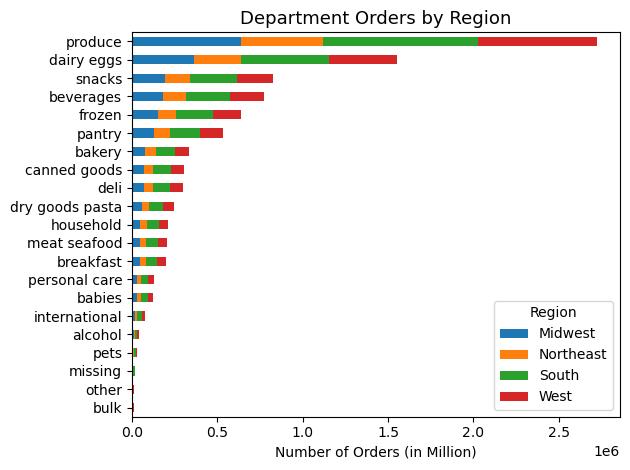

In [34]:
# Horizontal bar chart showing total orders by department and region

# Group by 'department' and 'Region', and count the occurrences
department_region_counts = df_small.groupby(['department', 'region']).size().unstack()

# Calculate the total number of orders for each department
total_orders = department_region_counts.sum(axis=1)

# Sort the data by total orders in descending order
sorted_data = department_region_counts.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart
order_dep_region = sorted_data.plot.barh(stacked=True)

# Add labels and a title
plt.xlabel('Number of Orders (in Million)')
plt.ylabel('')
plt.title('Department Orders by Region', fontsize=13)

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add a legend
plt.legend(title='Region')

# Adjust the layout to ensure everything fits
plt.tight_layout()


In [35]:
order_dep_region.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/order_dep_region_bar.png'))

In [36]:
#delete df to save space 

del department_region_counts
del total_orders
del sorted_data
del order_dep_region

gc.collect()

9204

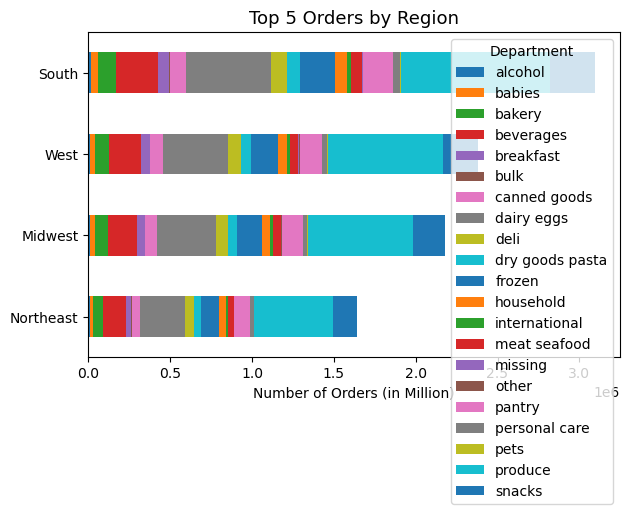

In [49]:
# Horizontal bar chart showing total orders by department and region

# Group by 'department' and 'Region', and count the occurrences
department_region_counts = df_small.groupby(['region', 'department']).size().unstack()

# Calculate the total number of orders for each department
total_orders = department_region_counts.sum(axis=1)

# Sort the data by total orders in descending order
sorted_data = department_region_counts.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart
order_dep_region_top = sorted_data.plot.barh(stacked=True)

ranking = department_region_counts.head(5)
index = ranking.index 


# Add labels and a title
plt.xlabel('')
plt.ylabel('')
plt.title('Top 5 Orders by Region', fontsize=13)

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add a legend
plt.legend(title='Department')

# Adjust the layout to ensure everything fits
plt.tight_layout()


### was trying to visualise the Top 5 Department Orders for each Region but was not sucessful

In [50]:
#delete df to save space 

del department_region_counts
del total_orders
del sorted_data
del order_dep_region_top

gc.collect()

18223

## Department Orders by Income

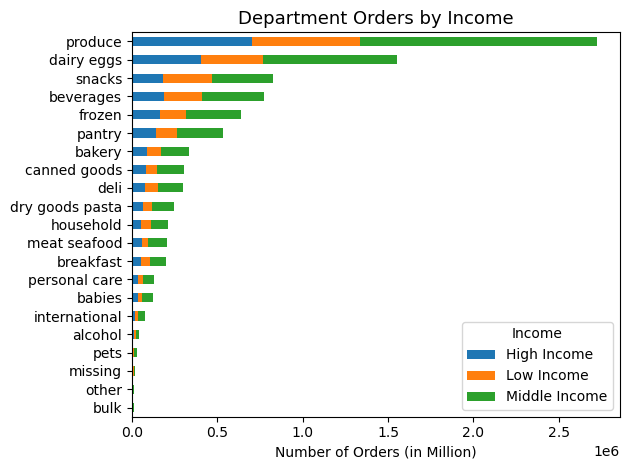

In [59]:
# Horizontal bar chart showing total orders by department and income

# Group by 'department' and 'income level', and count the occurrences
department_income_counts = df_small.groupby(['department', 'income_level']).size().unstack()

# Calculate the total number of orders for each department
total_orders = department_income_counts.sum(axis=1)

# Sort the data by total orders in descending order
sorted_data = department_income_counts.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart
order_income_region = sorted_data.plot.barh(stacked=True)

# Add labels and a title
plt.xlabel('Number of Orders (in Million)')
plt.ylabel('')
plt.title('Department Orders by Income', fontsize=13)

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add a legend
plt.legend(title='Income')

# Adjust the layout to ensure everything fits
plt.tight_layout()


In [60]:
order_income_region.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/order_income_region_bar.png'))

In [61]:
#delete df to save space 

del department_income_counts
del total_orders
del sorted_data
del order_income_region

gc.collect()

8407

In [57]:
#delete df to save space 

del department_region_counts

gc.collect()

0

## Department Orders by Marital Status

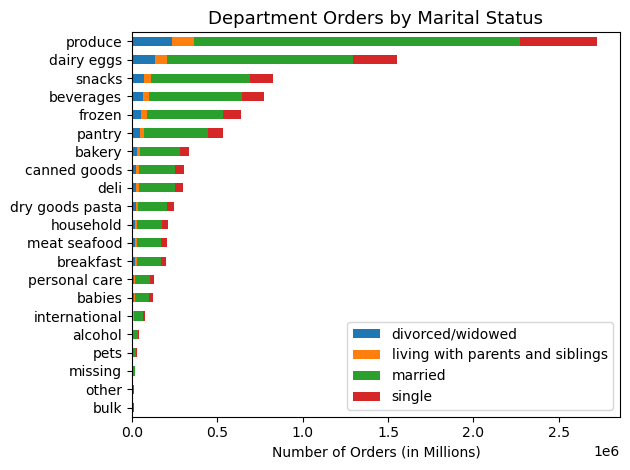

In [65]:
# Horizontal bar chart showing total orders by department and income

# Group by 'department' and 'marital status', and count the occurrences
department_marital_counts = df_small.groupby(['department', 'marital_status']).size().unstack()

# Calculate the total number of orders for each department
total_orders = department_marital_counts.sum(axis=1)

# Sort the data by total orders in descending order
sorted_data = department_marital_counts.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart
order_mart_region = sorted_data.plot.barh(stacked=True)

# Add labels and a title
plt.xlabel('Number of Orders (in Millions)')
plt.ylabel('')
plt.title('Department Orders by Marital Status', fontsize=13)

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add a legend
plt.legend(title='')

# Adjust the layout to ensure everything fits
plt.tight_layout()


In [62]:
order_mart_region.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/order_martial_status_region_bar.png'))

In [66]:
#delete df to save space 

del department_marital_counts
del total_orders
del sorted_data
del order_mart_region

gc.collect()

26942

## Department Orders by Age Group

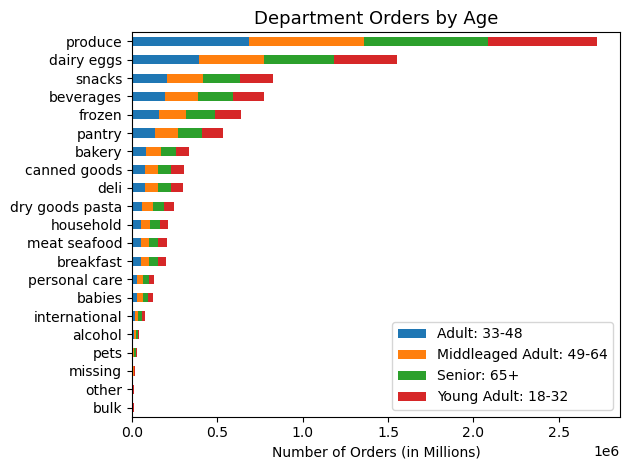

In [68]:
# Horizontal bar chart showing total orders by department and Age group

# Group by 'department' and 'age_group', and count the occurrences
department_age_counts = df_small.groupby(['department', 'age_group']).size().unstack()

# Calculate the total number of orders for each department
total_orders = department_age_counts.sum(axis=1)

# Sort the data by total orders in descending order
sorted_data = department_age_counts.loc[total_orders.sort_values(ascending=False).index]

# Plot the stacked horizontal bar chart
order_age_region = sorted_data.plot.barh(stacked=True)

# Add labels and a title
plt.xlabel('Number of Orders (in Millions)')
plt.ylabel('')
plt.title('Department Orders by Age', fontsize=13)

# Reverse the order of the y-axis
plt.gca().invert_yaxis()

# Add a legend
plt.legend(title='')

# Adjust the layout to ensure everything fits
plt.tight_layout()


In [69]:
order_age_region.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/dep_order_age_region_bar.png'))

In [70]:
#delete df to save space 

del department_age_counts
del total_orders
del sorted_data
del order_age_region

gc.collect()

9203

## Department: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [71]:
# Aggregated Data for department

df_small.groupby('department').agg({'clients_order_number': ['mean','max','min'], 'prices': ['mean','sum','max','min'], 'orders_day_of_week': ['mean'], 'order_hour_of_day': ['mean', 'min', 'max']})

clients_order_number             prices                \
                                mean max min       mean           sum   
department                                                              
alcohol                    16.102320  99   1   8.139768  3.528915e+05   
babies                     19.882886  99   1   7.638423  9.415502e+05   
bakery                     17.895784  99   1   7.859797  2.641969e+06   
beverages                  17.923681  99   1   7.677733  5.923632e+06   
breakfast                  17.497561  99   1   8.026405  1.614359e+06   
bulk                       20.907468  99   1   8.350821  8.375038e+04   
canned goods               16.932895  99   1   7.548403  2.292571e+06   
dairy eggs                 18.324852  99   1   8.331960  1.292407e+07   
deli                       17.143144  99   1   7.787267  2.341452e+06   
dry goods pasta            16.636736  99   1   7.352087  1.813716e+06   
frozen                     16.173766  99   1   7.733360  4.928192e+06   
household                  16.478025  99   1   7.381130  1.552333e+06   
international              17.212597  99   1   7.696612  5.912999e+05   
meat seafood               16.595952  99   1  16.304350  3.298256e+06   
missing                    24.208696  99   1   8.666858  1.704338e+05   
other                      18.132828  99   1   6.936081  7.221848e+04   
pantry                     17.358789  99   1   8.019424  4.294394e+06   
personal care              16.896196  99   1   8.001267  1.019009e+06   
pets                       15.886527  99   1   7.897812  2.203568e+05   
produce                    18.488467  99   1   7.980784  2.173215e+07   
snacks                     17.818352  99   1   4.273592  3.541461e+06   

                                     orders_day_of_week order_hour_of_day      \
                       max       min               mean              mean min   
department                                                                      
alcohol          15.000000  1.000000           3.168312         13.577709   0   
babies           15.000000  1.000000           2.705448         13.389429   0   
bakery           15.000000  1.000000           2.743477         13.393024   0   
beverages        15.000000  1.000000           2.807373         13.293001   0   
breakfast        14.898438  1.000000           2.732741         13.308620   0   
bulk             14.101562  1.400391           2.742447         13.470535   0   
canned goods     15.000000  1.000000           2.712188         13.437363   0   
dairy eggs       15.000000  1.000000           2.744217         13.357281   0   
deli             15.000000  1.000000           2.705022         13.474190   0   
dry goods pasta  15.000000  1.000000           2.690211         13.526138   0   
frozen           15.000000  1.000000           2.794299         13.660492   0   
household        15.000000  1.000000           2.835177         13.339592   0   
international    15.000000  1.000000           2.693294         13.519694   0   
meat seafood     25.000000  8.000000           2.719911         13.459962   0   
missing          15.000000  1.000000           2.833003         13.404221   0   
other            15.000000  1.099609           2.831829         13.507876   0   
pantry           20.000000  1.000000           2.810250         13.450578   0   
personal care    15.000000  1.000000           2.831747         13.464949   0   
pets             15.000000  1.000000           2.956489         13.600982   0   
produce          15.000000  1.000000           2.689676         13.413894   0   
snacks            7.000000  1.599609           2.751412         13.348938   0   

                     
                max  
department           
alcohol          23  
babies           23  
bakery           23  
beverages        23  
breakfast        23  
bulk             23  
canned goods     23  
dairy eggs       23  
deli             23  
dry goods pasta  23  
frozen           23  
household 

## Export merged Dataset (orders, products, customers, departments )

In [72]:
#Export df_merged to PKL
df_merged.to_pickle(os.path.join(path,'Prepared Data', 'orders_products_customers_departments.pkl'))

In [73]:
#delete df to save space 

del ords_prods
del df_merged 
del dev 
del df_big
del df_small

gc.collect()

0